In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from mlxtend.evaluate import bias_variance_decomp

### PCA 
Principal Components Analysis (PCA) is a pre-processing technique that is used to reduce the dimension of a dataset. Reducing the dimension of a dataset can be useful for various reasons, for example: it reduces the learning time and the computational resources needed, it helps to reduce overfitting, it helps us to visualize the data. PCA is often used to pre-process data for classification problems. Here, we will use PCA on two Machine Learning models used for solving a regression problem. The benefits of using PCA on regression problems will also be evaluated. The algorithms we will use PCA on are: the linear regression model, and the multi-layered perceptron models.

#### Working of PCA
PCA works by finding Principal Components in the data.

The first step is to center de data around the origin and to fit a line trough it. To find the best fitting line, the sum of squared distances is used SS(distances). The best fitting line is the line with the largest SS(distances). This line is the first principal component. This line is a linear combination of features of the data. To find the next principal component, we fit a line trough the origin and it has to be perpendicular to the first principal component. We can find as much principal components as there are features in the dataset.

After all the principal components have been found, we can use their SS(distances), i.e their eigenvalues, to find the amount of variation that each principal components account for. When for example two principal components account for the majority of the variation, then we can use these two components to approximate the whole dataset. When these two principal components don't account for the majority of the variation, then this means that we would need more principal components to correctly represent the dataset.


## Applying PCA on regression algorithms

### Generated Dataset

In [2]:
#We generate a dataset with 4 features, and two features who are actually informative.

X,y,c = make_regression(n_samples=1000,n_features=4,
                        coef=True,
                        random_state=0)

In [3]:
# Testing on generated data

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)


In [4]:
df_train = pd.DataFrame(train_data)

df_train

,0,1,2,3
0,-0.385490,-0.386871,0.183925,-0.510293
1,0.243168,0.457310,0.770837,0.962342
2,0.089620,-0.743228,-0.825779,-0.395222
3,0.797795,-0.102437,-0.070340,-0.619805
4,0.272796,0.026738,-0.470742,0.183450
...,...,...,...,...
852,-0.470024,0.242890,-1.021560,-0.400835
853,-0.277391,-0.363438,-1.509662,0.779051
854,1.081935,-0.346249,0.197967,-0.794636
855,-1.019251,1.951761,0.938585,1.239941


In [5]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [6]:
pca = PCA() #Apply PCA to reduce the data to two dimensions

pca.fit(train_data)

PCA()

In [7]:
pca.n_components

train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [8]:
pca.components_

array([[-0.58960459, -0.4489989 ,  0.29211461,  0.60451259],
       [ 0.44492701,  0.39599   ,  0.70318718,  0.38827782],
       [ 0.34664451, -0.73288321,  0.41908636, -0.40876205],
       [-0.57813837,  0.32322456,  0.49453359, -0.56277744]])

### Cross Validation

We will use the k-fold cross-validation method to analyze the performance of the models.

In [9]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []

## PCA with linear regression

In [10]:
reg = LinearRegression().fit(train_data, train_lbl)

In [11]:
reg.score(train_data, train_lbl)

1.0

In [12]:
reg.predict(test_data)

array([ 3.07520257e+01,  3.51968186e+01, -1.70300282e+02, -1.25923077e+02,
       -1.73608814e+02, -1.87316575e+02,  4.46325571e+01, -3.11810253e+02,
        4.58478007e+01,  3.16312424e+01,  2.06795965e+02, -1.10865807e+02,
       -9.27598274e+01, -1.92555537e+01, -8.50395786e+01, -1.20152832e+02,
       -8.52132708e+01,  1.08875432e+02, -5.22304642e+00, -1.63809199e+02,
       -5.70225928e+01,  6.41115052e+01, -3.95679426e+02,  4.20579593e+01,
       -2.19862047e+02, -3.17528646e+02, -1.09129380e+02,  1.10896552e+02,
        4.39235559e+01, -1.26743185e+02,  1.56246466e+02,  5.36601761e+01,
        6.66024006e+01,  1.73057308e+02, -2.57360859e+01,  3.17535415e+01,
        1.61798940e+02,  1.60476582e+02,  1.49602262e+01,  1.50791448e+02,
        7.11198806e+01,  1.85989485e+02, -7.55365756e+00, -4.25250618e+01,
        4.79163494e+01, -1.96583485e+02, -2.35526912e+02, -1.65133229e+00,
       -2.72606210e+00, -5.67228174e+01, -1.01194190e+02, -1.89519358e+02,
       -1.16989845e+02, -

In [13]:
reg.score(test_data,test_lbl)

1.0

#### Analyzing the components needed to accurately represent the data

Text(0.5, 1.0, 'hp')

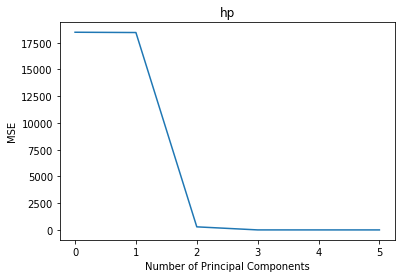

In [14]:
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(reg,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(reg,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

On this plot we can see that the 4 components are needed to get the mean squared error to be minimal. However, if there were features that did not account for much of the variance, these features could be left out. Therefore, we could represent the data accurately with less dimensions.

In [15]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 26.56,  52.43,  76.98, 100.01])

With the first principal component we can explain 25,75 % of the variance, when we add the second one we can explain 51,07 % of the variance, with the 3rd one 75,61% of the variance and with the 4th one, we can explain all the variance. This means that if we want to reduce the dimension of the data, we will lose a significant amount of information about the data.

In [16]:
# Function to perform PCA on the data and then use a regression model on the data.

def pcr(X,y,model,pc):
    ''' Principal Component Regression in Python'''
    ''' Step 1: PCA on input data'''

        # Define the PCA object
    pca = PCA()

    # Preprocessing : Standarsize the data
    
    Xstd = StandardScaler().fit_transform(X)

    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]

    ''' Step 2: regression on selected principal components'''

    # Create linear regression object
    regr = model

    # Fit
    regr.fit(Xreg, y)

    # Calibration
    y_c = regr.predict(Xreg)

    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

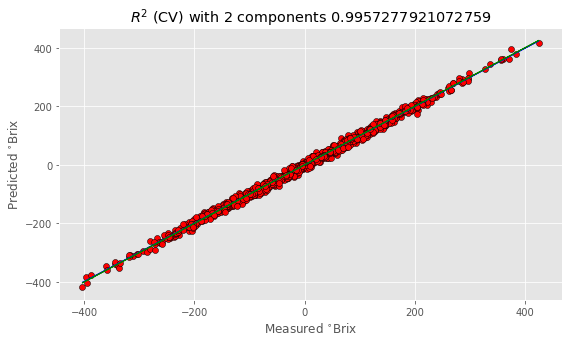

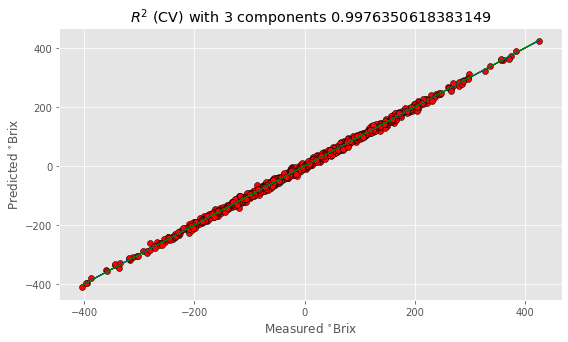

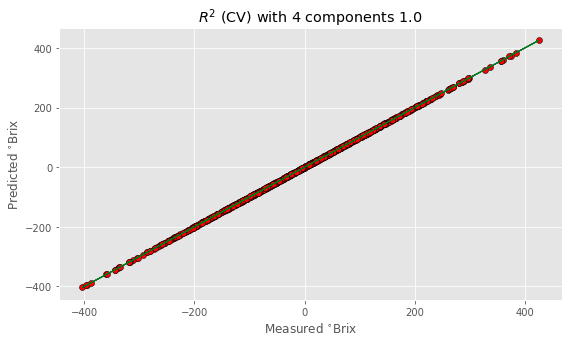

In [18]:
model = linear_model.LinearRegression()

for i in np.arange(2,5):
    predicted, r2r, r2cv, mser, mscv = pcr(X,y,model, pc=i) # Compare with using only two components.

    # Regression plot
    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV) with '+ str(i) +' components '+str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()

On this plot we have a green line representing the correct correlation between the measured and the predicted values. The blue line represents the actual correlation after using PCA with two components. R² is a measure of how well the actual correlation after using PCA corresponds to the correct correlation. This means that after training on the dataset reduced to two dimensions, our algorithm will be accurately predict 72.2% of the times. The best possible value for R² is 100%, but 72,2% is not a bad value for R². This number could be increased if the first two principal components accounted for more of the total variance.

#### Without PCA

In [279]:
##TODO 

### 

## PCA with Multi layer perceptron regressor

In [20]:
regr = MLPRegressor()

regr.fit(train_data,train_lbl)

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor()

In [281]:
regr.score(test_data,test_lbl)

0.9810968436470511

### Analyzing the components needed to accurately represent the data

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'hp')

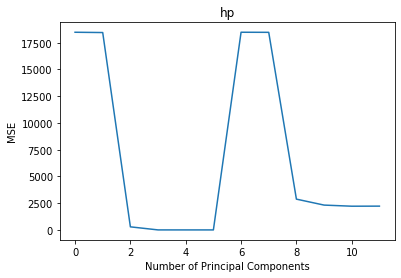

In [22]:
# Calculate MSE with only the intercept

mse = []

score = -1*model_selection.cross_val_score(regr,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

We can see that the MSE is minimal when we use 4 principal components. However, we will try to use 2 and see how our model will perform.

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

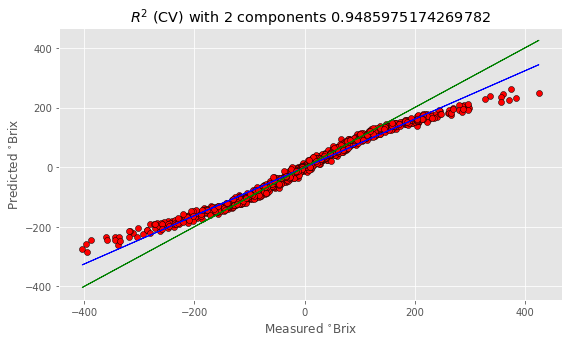

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

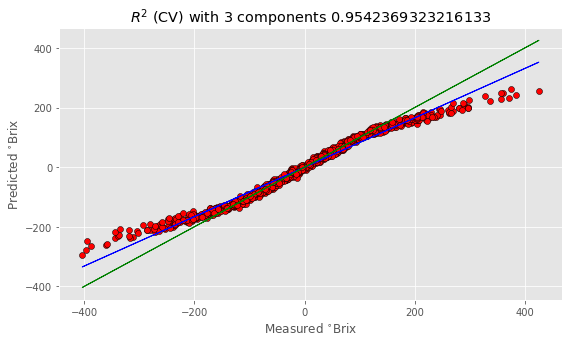

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

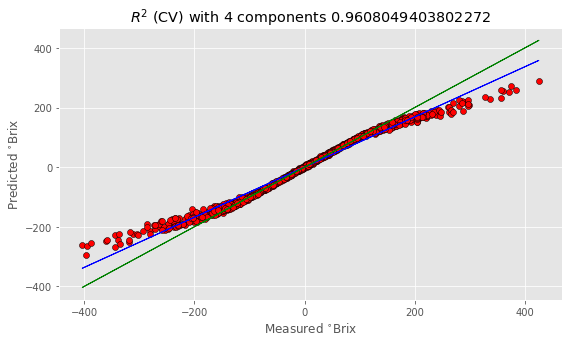

In [21]:
model = regr

for i in np.arange(2,5):
    predicted, r2r, r2cv, mser, mscv = pcr(X,y,model, pc=i) # Compare with using only two components.

    # Regression plot
    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV) with '+ str(i) +' components '+str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()

Here, the result is similar as with the linear regression algorithm. The green line represents the actual correlation between the predicted values and the measured values, and the blue line represents the actual correlation found after using PCA with two components. The correlation between these two lines is 39.5%

With both algorithms we lose some information on the data by reducing the dimensions. The amount of data we lose can be reduced by using more principal components.

### Real dataset

In [23]:
df_real = pd.read_csv (r'C:\Users\KLaptop\Desktop\School\Master\Sem_2\Statistical Foundations of ML\Real estate.csv')


dataframe = pd.DataFrame(df_real)

dataframe

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [286]:
y=dataframe['Y house price of unit area']
X=dataframe.drop(['Y house price of unit area'],axis=1)

In [287]:
# Split the data

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

In [288]:
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [289]:
pca.fit(train_data)

train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [290]:
reg = LinearRegression().fit(train_data, train_lbl)

Text(0.5, 1.0, 'hp')

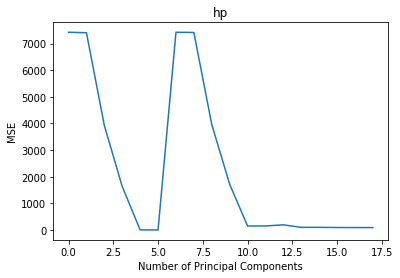

In [292]:
mse = []
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(reg,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(reg,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [293]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 38.32,  53.89,  68.22,  81.75,  90.07,  97.96, 100.  ])

This array tells us that by using 4 principal components, we can cover 81.75% of the variance. 

In [309]:
np.arange(2,5)

array([2, 3, 4])

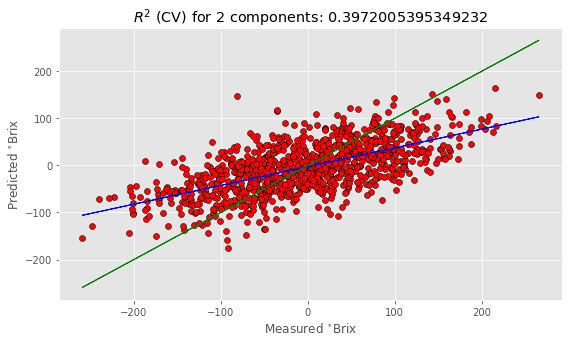

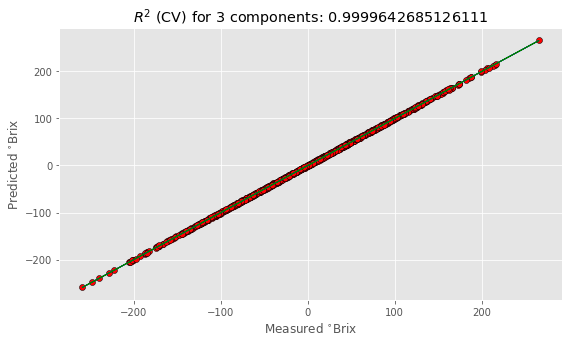

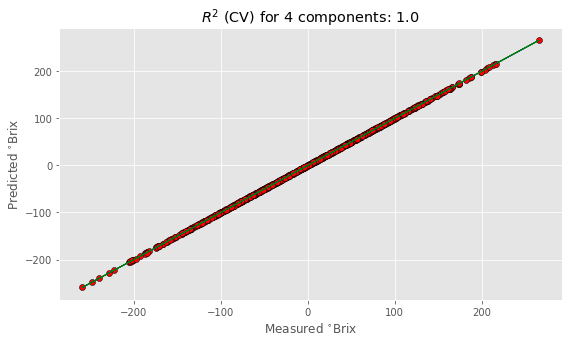

In [312]:
model = linear_model.LinearRegression()

for i in np.arange(2,5):
    predicted, r2r, r2cv, mser, mscv = pcr(X,y, model, pc=i) # Compare with using only two components.

    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV) for '+ str(i) +' components: '  +str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()

Here again the goal is that the correlation between the green line and the blue line equals one. We see that with 2 principal components, the correlation is not great. However, when we add the third principal component, the correlation goes up to 1, which is almost perfect. This means that when we reduce the dimensions to 3 dimensions, the new dataset contains enough information such that the linear regression model is able to learn on it, as good as on the original dataset.

### MLP 

In [295]:
regr = MLPRegressor()

regr.fit(train_data,train_lbl)

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor()

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

Text(0.5, 1.0, 'hp')

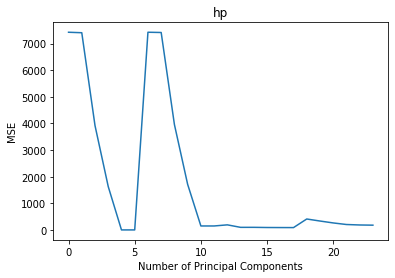

In [296]:
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

On this plot we see that, 4 principal components are necessary to accurately represent the data. This is because, when we use 4 principal components, the MSE is 0.

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

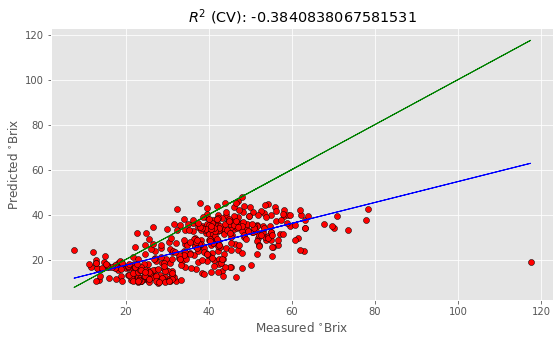

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

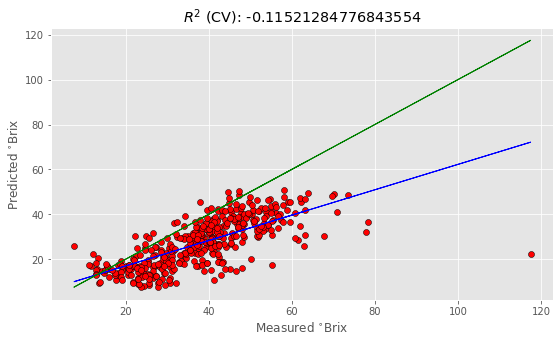

C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\KLaptop\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

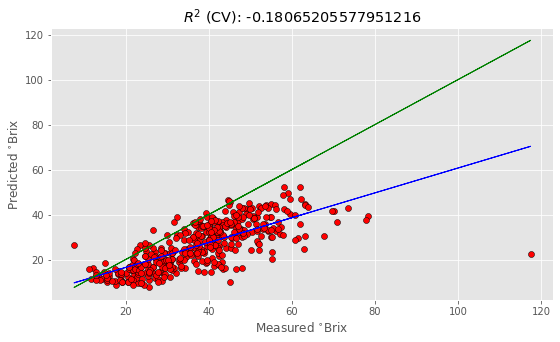

In [297]:

for i in np.arange(2,5):
    
    predicted, r2r, r2cv, mser, mscv = pcr(X,y, regr, pc=i) # Compare with using only two components.

    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV)for '+ str(i) +' components: ' +str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()
    

We see that the correlation in this example with the MLP regressor is negative. This means that the MLP regressor model is not able to learn the underlying target function correctly given the dataset after dimension reduction.